# Introduction

This predictive classification analysis will try to predict whether a person has a heart disease or not based on 14 different features, where 8 of them are categorical features and the rest is numerical.

Table of contents is shared below for understanding the flow of the project;

## Table of Contents
    1- Importing Dataset
    2- Data Exploration & Visualization
    3- Data Wrangling and Feature Scaling
    4- Predictive Machine Learning Models Implications
    5- Hyperparameter Tunings
    6- Conclusion

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Importing Dataset

In [2]:
data = pd.read_csv("data/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2. Data Exploration & Visualization

    Data contains;

    age - age in years
    sex - (1 = male; 0 = female)
    cp - chest pain type
    trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    chol - serum cholestoral in mg/dl
    fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    restecg - resting electrocardiographic results
    thalach - maximum heart rate achieved
    exang - exercise induced angina (1 = yes; 0 = no)
    oldpeak - ST depression induced by exercise relative to rest
    slope - the slope of the peak exercise ST segment
    ca - number of major vessels (0-3) colored by flourosopy
    thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
    target - have disease or not (1=yes, 0=no)

In [3]:
categorical_columns = ['sex', 'cp', 'exang', 'ca', 'thal','fbs', 'restecg', 'slope']


In [4]:
data.shape

(303, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
# Checking categorical columns for further analysis

categorical_columns = ["sex","cp","exang","ca","thal","target","fbs","restecg","slope"]

for col in categorical_columns:
    print(data[col].unique())

[1 0]
[3 2 1 0]
[0 1]
[0 2 1 3 4]
[1 2 3 0]
[1 0]
[1 0]
[0 1 2]
[0 2 1]


In [7]:
# Descriptive statistics of the dataset

data.drop(columns=categorical_columns).describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [8]:
# Database is pretty clean and ready for further analysis.

# No data-type conversion or removing missing value is needed at this point until further
# classification process.

Text(0.5, 0, 'Gender')

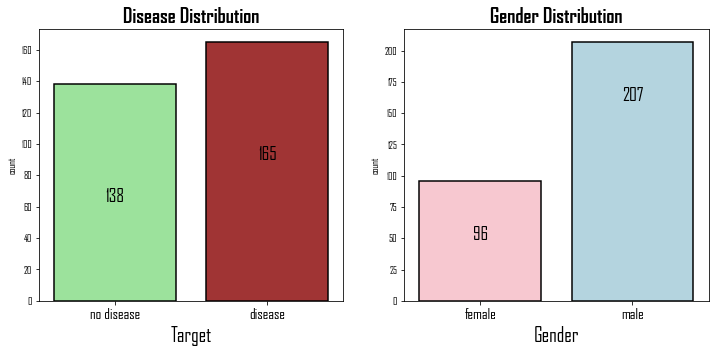

In [9]:
# checking target and gender distribution

plt.rcParams["font.family"] = "agency fb"

fig, ax = plt.subplots(1,2,figsize=(12,5))

sns.countplot(data=data,x="target",palette=['lightgreen','firebrick'],edgecolor="k",
              linewidth=1.5,ax=ax[0])
for p in ax[0].patches:
    ax[0].annotate(f'\n{p.get_height()}', 
                (p.get_x()+0.4, p.get_height()-65), ha='center', va='center', color='k', size=18)
ax[0].set_title("Disease Distribution",size=20,fontweight="bold")
ax[0].set_xticklabels(["no disease","disease"],size=15)
ax[0].set_xlabel("Target",size=20)

sns.countplot(data=data,x="sex",palette=['pink',"lightblue"],edgecolor="k",linewidth=1.5,ax=ax[1])
for p in ax[1].patches:
    ax[1].annotate(f'\n{p.get_height()}', 
                (p.get_x()+0.4, p.get_height()-35), ha='center', va='center', color='k', size=18)
ax[1].set_title("Gender Distribution",size=20,fontweight="bold")
ax[1].set_xticklabels(["female","male"],size=15)
ax[1].set_xlabel("Gender",size=20)

In [10]:
# There are 165 people with disease, whereas 138 people without disease in the dataset.

disease_percentage = str((len(data[data["target"]==1])/len(data))*100)[0:4]
print("Disease percentage :", disease_percentage)
no_disease_percentage = str((len(data[data["target"]==0])/len(data))*100)[0:4]
print("Disease percentage :", no_disease_percentage,"\n")

# There are total 207 male and 96 female in the dataset.
male_percentage = str((len(data[data["sex"]==1])/len(data))*100)[0:4]
print("Male percentage :", male_percentage)
female_percentage = str(100-((len(data[data["sex"]==1])/len(data))*100))[0:4]
print("Female percentage :", str(100-((len(data[data["sex"]==1])/len(data))*100))[0:4])

Disease percentage : 54.4
Disease percentage : 45.5 

Male percentage : 68.3
Female percentage : 31.6


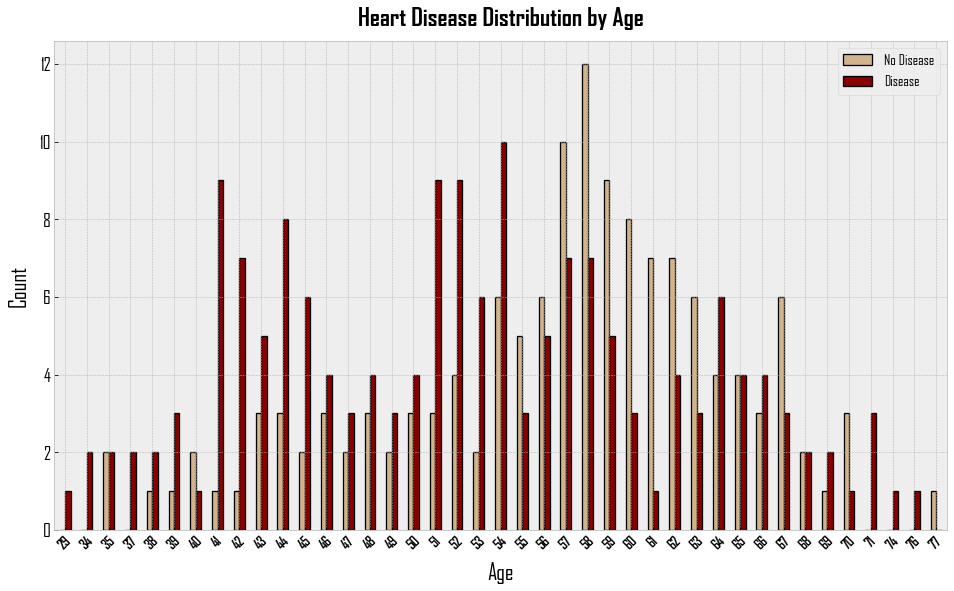

In [11]:
# Plotting Heart Disease Frequency by Age

plt.rcParams["figure.figsize"]=(16,9)
plt.style.use("bmh")

pd.crosstab(index=data["age"],columns=data["target"]).plot(kind="bar",color=['tan','darkred'],
                                                          linewidth=1.3,edgecolor="k")
plt.title("Heart Disease Distribution by Age",size=25,fontweight="bold",pad=15)
plt.xlabel('Age',size=23,labelpad=10)
plt.ylabel('Count',size=23,labelpad=10)
plt.xticks(size=13,rotation=45,fontweight="bold")
plt.yticks(size=18)
plt.legend(["No Disease","Disease"],fontsize="x-large")

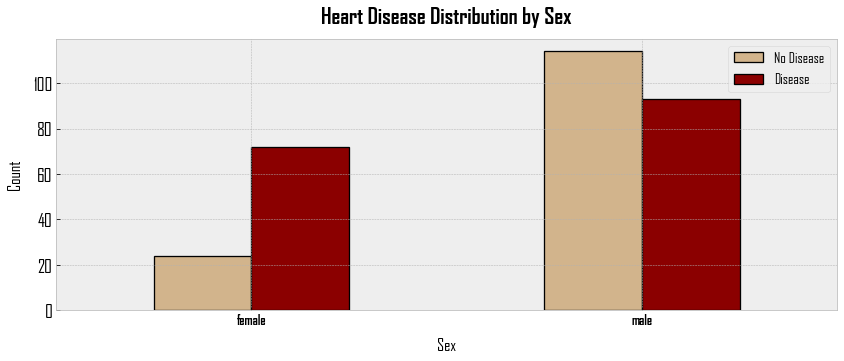

In [12]:
# Plotting Heart Disease Frequency by Sex

plt.rcParams["figure.figsize"]=(14,5)
plt.style.use("bmh")

fig, ax = plt.subplots()
pd.crosstab(index=data["sex"],columns=data["target"]).plot(kind="bar",color=['tan','darkred'],
                                                          linewidth=1.3,edgecolor="k",ax=ax)
plt.title("Heart Disease Distribution by Sex",size=22,fontweight="bold",pad=15)
plt.xlabel('Sex',size=17,labelpad=10)
plt.ylabel('Count',size=17,labelpad=10)
ax.set_xticklabels(["female","male"])
plt.xticks(size=13,rotation=0,fontweight="bold")
plt.yticks(size=18)
plt.legend(["No Disease","Disease"],fontsize="x-large")

# Apparently, the older the people become, there are higher chances of hearth disease.

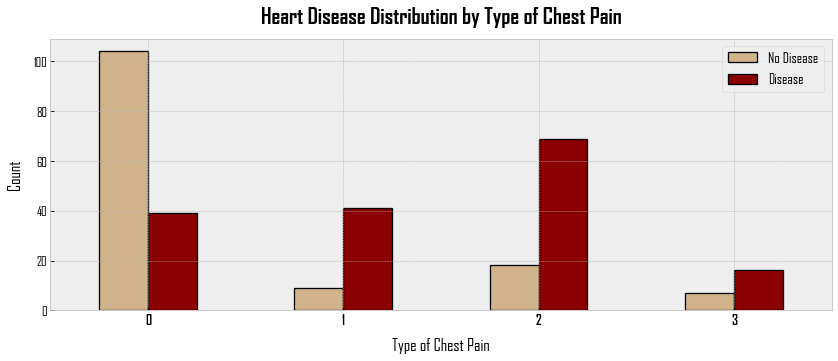

In [13]:
fig, ax = plt.subplots()
pd.crosstab(index=data["cp"],columns=data["target"]).plot(kind="bar",color=['tan','darkred'],
                                                          linewidth=1.3,edgecolor="k",ax=ax)
plt.title("Heart Disease Distribution by Type of Chest Pain",size=22,fontweight="bold",pad=15)
plt.xlabel('Type of Chest Pain',size=17,labelpad=10)
plt.ylabel('Count',size=17,labelpad=10)
#ax.set_xticklabels(["female","male"])
plt.xticks(size=13,rotation=0,fontweight="bold")
plt.yticks(size=13)
plt.legend(["No Disease","Disease"],fontsize="x-large")

# Apparently, chest pain type 1, 2 and 3 have some relationship with hearth disease occurence.

<AxesSubplot:>

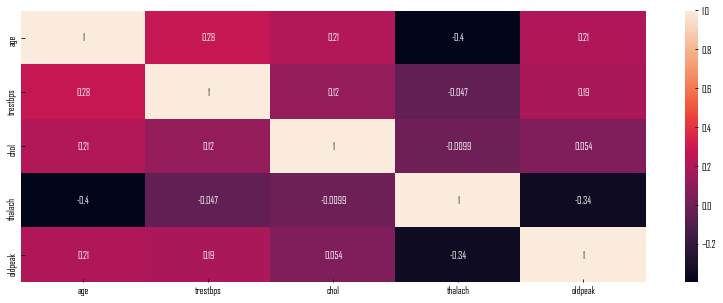

In [14]:
# Checking multi-collinearity between features for further analysis by using heatmap

sns.heatmap(data.drop(columns=categorical_columns).corr(),annot=True)

# None of the features are highly correlated with each other, which is nice for further analysis.

In [15]:
# Checking multi-collinearity wih color map as well just to see if I miss any multi-correlation
def color_negative_red(val):
    color = 'darkred' if 0.5 > val > -0.5 else 'cyan'  # If there is moderate/strong relat. then cyan
    return 'color: %s' % color

data.drop(columns=categorical_columns).corr().style.applymap(color_negative_red)

#No correlation between features, we are ready for predictive analysis with those numerical features.

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trestbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


### 3. Data Wrangling and Feature Scaling

##### Creating Dummy Variables

In [16]:
data_backup = data.copy()

In [17]:
data = data_backup.copy()

In [18]:
# Adding dummy variables and dropping original features
categorical_columns = ['sex', 'cp', 'exang', 'ca', 'thal','fbs', 'restecg', 'slope']

for col in categorical_columns:
    data = pd.get_dummies(data,columns=[col])

In [19]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,thal_2,thal_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2
0,63,145,233,150,2.3,1,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,0,1,0,1,0,0,0,0,1
3,56,120,236,178,0.8,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
4,57,120,354,163,0.6,1,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1


##### Splitting dataset

In [20]:
from sklearn.model_selection import train_test_split

X = data.drop(columns="target",axis=1)
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

##### Normalizing Numerical Data

In [21]:
from sklearn.preprocessing import MinMaxScaler

# fitting scaler on training data
norm = MinMaxScaler().fit(X_train)

# transforming training data
X_train_norm = norm.transform(X_train)

# transforming testing data
X_test_norm = norm.transform(X_test)

### 4. Predictive Machine Learning Models Implications

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report, roc_auc_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#### a) Applying Logistic Classification

In [23]:
# creating model
lr_model = LogisticRegression(max_iter=10000)

# fitting model
lr_model.fit(X_train,y_train)

# predicting outcome
y_pred_lr = lr_model.predict(X_test)

pd.DataFrame({"Actual":y_test,"Predicted":y_pred_lr}).sample(10)

,Actual,Predicted
178,0,0
113,1,1
242,0,0
10,1,1
262,0,0
200,0,1
146,1,1
155,1,1
177,0,1
183,0,0


#### a-1) Evaluating Logistic Classification Model

In [24]:
# Confusion Matrix 

confusion_matrix(y_test,y_pred_lr)

TN = confusion_matrix(y_test,y_pred_lr)[0][0]
TP = confusion_matrix(y_test,y_pred_lr)[1][1]

fp = confusion_matrix(y_test,y_pred_lr)[0][1]
fn = confusion_matrix(y_test,y_pred_lr)[1][0]

# Checking Accuracy
print("Accuracy score is {:.2f}.".format(accuracy_score(y_test,y_pred_lr)))

Accuracy score is 0.87.


In [25]:
# Recall / Sensivity

'''
-Something we want to maximize
-How "sensitive" is the classifier to detecting positive instances?
-Also known as "True Positive Rate" or "Recall"
-TP / all positive
    all positive = TP + FN

Applying the same understanding, we know that Recall shall be the model metric we use to select 
our best model when there is a high cost associated with False Negative.

Mostly used in fraud detection or sick patient detection.
'''

print("Sensivity score is {:.3f}.".format(recall_score(y_test,y_pred_lr)))

Sensivity score is 0.925.


In [26]:
# Precision 

'''
Precision is a good measure to determine, when the costs of False Positive is high. 

For instance, email spam detection. In email spam detection, a false positive means that an email 
that is non-spam (actual negative) has been identified as spam (predicted spam). 

The email user might lose important emails if the precision is not high for the spam detection model.

Precision = TP / (TP+FP)
'''


precision = TP/(TP+fp)
print(f"Precision score is {str(precision)[:5]}.")

Precision score is 0.880.


In [27]:
# F1 Score
'''
F1 Score is needed when you want to seek a balance between Precision and Recall. 
Right…so what is the difference between F1 Score and Accuracy then? We have previously 
seen that accuracy can be largely contributed by a large number of True Negatives which in
most business circumstances, we do not focus on much whereas False Negative and False Positive 
usually has business costs (tangible & intangible) thus

F1 Score might be a better measure to use if we need to seek a balance between Precision 
and Recall AND there is an uneven class distribution (large number of Actual Negatives).
'''
print(f"F-1 score is {f1_score(y_test,y_pred_lr)}.")

F-1 score is 0.9024390243902439.


#### a-2) Summary of Logistic Regression Model

In [28]:
print("Accuracy score is {:.2f}.".format(accuracy_score(y_test,y_pred_lr)))
print("Sensivity score is {:.3f}.".format(recall_score(y_test,y_pred_lr)))
#print(f"Precision score is {str(precision)[:5]}.")
print(f"F-1 score is {f1_score(y_test,y_pred_lr)}.\n\n")

print(classification_report(y_test,y_pred_lr))
print(f"\n\nROC AUC Score: {roc_auc_score(y_test,y_pred_lr)}")

Accuracy score is 0.87.
Sensivity score is 0.925.
F-1 score is 0.9024390243902439.


              precision    recall  f1-score   support

           0       0.84      0.76      0.80        21
           1       0.88      0.93      0.90        40

    accuracy                           0.87        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.87      0.87      0.87        61



ROC AUC Score: 0.8434523809523808


#### b) Applying Random Forest Model 

In [29]:
# creating model
rf_model = RandomForestClassifier()

# fitting model
rf_model.fit(X_train,y_train)


# predicting outcome 
y_pred_rf = rf_model.predict(X_test)

y_pred_rf_training = rf_model.predict(X_train)

pd.DataFrame({"Actual":y_test,"Predicted":y_pred_rf}).sample(10)

,Actual,Predicted
178,0,0
253,0,0
262,0,0
31,1,1
298,0,0
121,1,1
132,1,1
192,0,0
41,1,1
213,0,0


#### b-1) Evaluating Random Forest Model

In [30]:
print("Accuracy score is {:.2f}.".format(accuracy_score(y_test,y_pred_rf)))
print("Sensivity score is {:.3f}.".format(recall_score(y_test,y_pred_rf)))
#print(f"Precision score is {str(precision)[:5]}.")
print(f"F-1 score is {str(f1_score(y_test,y_pred_rf))[:4]}.")

print(f"\n\nROC AUC Score: {roc_auc_score(y_test,y_pred_rf)}")

Accuracy score is 0.82.
Sensivity score is 0.800.
F-1 score is 0.85.


ROC AUC Score: 0.8285714285714286


#### b-2) Hyperparameter Tuning for Random Forest Model

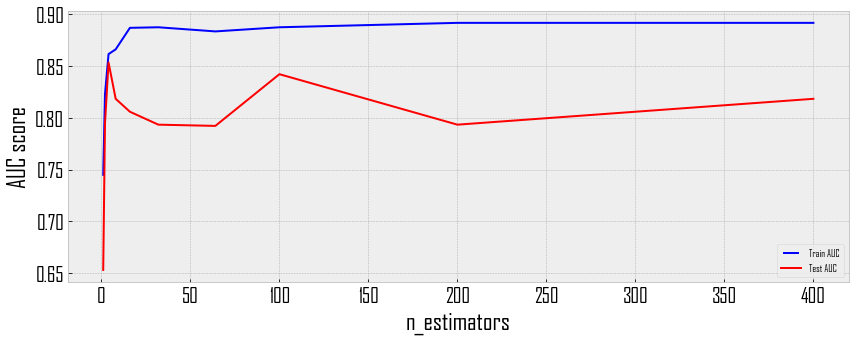

In [31]:
# ROC Curve for N_estimators

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 400]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1,random_state=0,min_samples_split=2,
                                 min_samples_leaf=1,max_features="sqrt",
                                 max_depth=3)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred_rf = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rf)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score",size=25)
plt.xlabel("n_estimators",size=25)
plt.xticks(size=20)
plt.yticks(size=20)
#plt.savefig("nestimator.png",dpi=300)
plt.show()

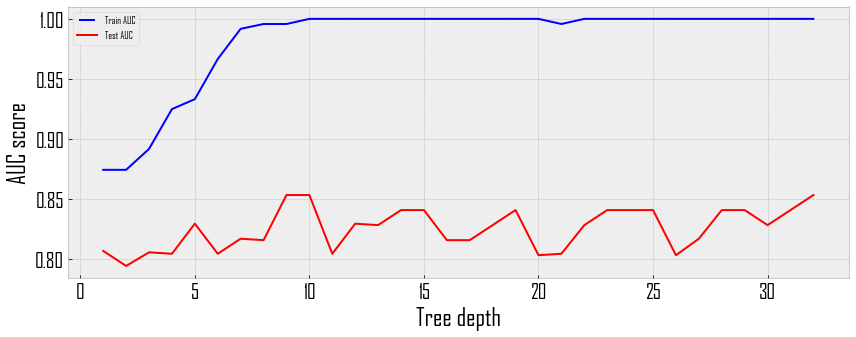

In [32]:
# ROC Curve for Max_Depth

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    
    rf = RandomForestClassifier(max_depth=max_depth)
    rf.fit(X_train, y_train)
    
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred_rf = rf.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rf)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depths, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score",size=25)
plt.xlabel("Tree depth",size=25)
plt.xticks(size=20)
plt.yticks(size=20)
#plt.savefig("treedepth.png",dpi=300)
plt.show()


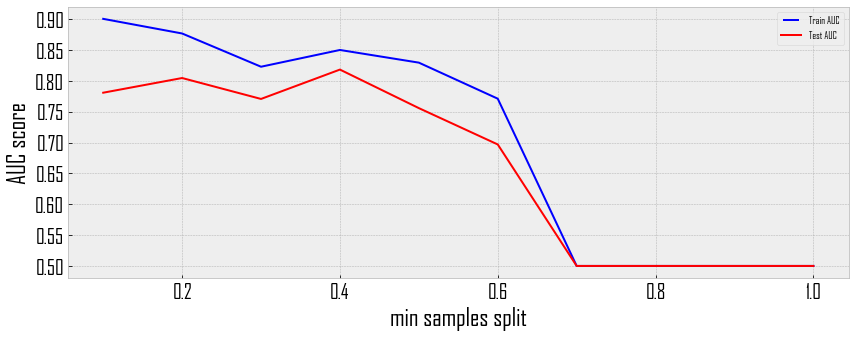

In [33]:
# ROC Curve for min_samples_split

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(max_depth=5,n_estimators=10,min_samples_split=min_samples_split)
    rf.fit(X_train, y_train)
    
    train_pred = rf.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred_rf = rf.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rf)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_splits, train_results, "b" ,label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, "r", label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel("AUC score",size=25)
plt.xlabel("min samples split",size=25)
plt.xticks(size=20)
plt.yticks(size=20)
#plt.savefig("minsamplesplit.png",dpi=300)
plt.show()

#### b-3) Random Forest Hyperparameter Grid

In [34]:
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 1000)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(0, 10, num = 10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [1, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 5, 10]

# Method of selecting samples for training each tree
bootstrap = [True, False]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 5, 10],
 'min_samples_split': [1, 5, 10],
 'n_estimators': [1,
                  1,
                  1,
                  1,
                  1,
                  1,
                  1,
                  1,
                  1,
                  1,
                  1,
                  2,
                  2,
                  2,
                  2,
                  2,
                  2,
                  2,
                  2,
                  2,
                  2,
                  3,
                  3,
                  3,
                  3,
                  3,
                  3,
                  3,
                  3,
                  3,
                  3,
                  4,
                  4,
                  4,
                  4,
                  4,
                  4,
                  4,
                  

#### b-4-a) Random Forest Hyperparameter Grid Training

In [35]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf_model = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 277 out of 300 | elapsed:    5.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    5.9s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [1, 5, 10],
                                        'n_estimators': [1, 1, 1, 1, 1, 1, 1, 1,
                                                         1, 1, 1, 2, 2, 2, 2, 2,
                                                         2, 2, 2, 2, 2, 3, 3, 3,
                                                         3, 3, 3, 3, 3, 3, ...]},
                   random_state=42, verbose=2)

In [36]:
rf_random.best_params_

{'n_estimators': 44,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 3,
 'bootstrap': True}

In [37]:
# creating a new model with new parameters based on above information
rf_model = RandomForestClassifier(random_state=0,
                                  min_samples_split=rf_random.best_params_["min_samples_split"],
                                 min_samples_leaf=rf_random.best_params_["min_samples_leaf"],
                                  n_estimators=rf_random.best_params_["n_estimators"],
                                  max_features=rf_random.best_params_["max_features"],
                                 max_depth=rf_random.best_params_["max_depth"])

# fitting model
rf_model.fit(X_train,y_train)

# predicting outcome
y_pred_rf = rf_model.predict(X_test)

pd.DataFrame({"Actual":y_test,"Predicted":y_pred_rf}).sample(10)

print("Accuracy score is {:.2f}.".format(accuracy_score(y_test,y_pred_rf)))
print("Sensivity score is {:.3f}.".format(recall_score(y_test,y_pred_rf)))
#print(f"Precision score is {str(precision)[:5]}.")
print(f"F-1 score is {str(f1_score(y_test,y_pred_rf))[:4]}.\n\n")

'''
Sensivity score increased from 0.868 to 0.921 on the test data.
Also, accuracy increased from 0.87 to 0.90
F-1 increased from 0.89 to 0.92
'''

print(classification_report(y_test,y_pred_rf))
print(f"\n\nROC AUC Score: {roc_auc_score(y_test,y_pred_rf)}")

Accuracy score is 0.82.
Sensivity score is 0.825.
F-1 score is 0.85.


              precision    recall  f1-score   support

           0       0.71      0.81      0.76        21
           1       0.89      0.82      0.86        40

    accuracy                           0.82        61
   macro avg       0.80      0.82      0.81        61
weighted avg       0.83      0.82      0.82        61



ROC AUC Score: 0.8172619047619047


In [38]:
training_error = np.mean(np.square(np.array(y_pred_rf)-np.array(y_test)))
training_error

0.18032786885245902

In [39]:
# testing training data with a new model by using new parameters based on above information

rf_model = RandomForestClassifier(random_state=0,
                                  min_samples_split=rf_random.best_params_["min_samples_split"],
                                 min_samples_leaf=rf_random.best_params_["min_samples_leaf"],
                                  n_estimators=rf_random.best_params_["n_estimators"],
                                  max_features=rf_random.best_params_["max_features"],
                                 max_depth=rf_random.best_params_["max_depth"])

rf_model.fit(X_train,y_train)


y_pred_rf_tr = rf_model.predict(X_train)


pd.DataFrame({"Actual":y_test,"Predicted":y_pred_rf}).sample(10)

print("Accuracy score is {:.2f}.".format(accuracy_score(y_train,y_pred_rf_tr)))
print("Sensivity score is {:.3f}.".format(recall_score(y_train,y_pred_rf_tr)))
#print(f"Precision score is {str(precision)[:5]}.")
print(f"F-1 score is {str(f1_score(y_train,y_pred_rf_tr))[:4]}.\n\n")

'''
Sensivity score increased from 0.868 to 0.921 on the test data.
Also, accuracy increased from 0.87 to 0.90
F-1 increased from 0.89 to 0.92
'''

print(classification_report(y_train,y_pred_rf_tr))
print(f"\n\nROC AUC Score: {roc_auc_score(y_train,y_pred_rf_tr)}")

Accuracy score is 0.88.
Sensivity score is 0.904.
F-1 score is 0.88.


              precision    recall  f1-score   support

           0       0.89      0.86      0.88       117
           1       0.88      0.90      0.89       125

    accuracy                           0.88       242
   macro avg       0.88      0.88      0.88       242
weighted avg       0.88      0.88      0.88       242



ROC AUC Score: 0.8836239316239316


In [40]:
'''
Summmary;

Model's initial performance was;

Accuracy: 0.823
Recall: 0.828
ROC AUC Score: 0.824

After hyperparameter tuning;

Accuracy: 0.872
Recall: 0.862 
ROC AUC Score: 0.868

Flow;

1- Get initial score
2- Draw graphs for parameters to see boundaries
3- Set parameter limits for GridSearch
4- Choose best parameters
5- Re-evaluate and compare
'''

"\nSummmary;\n\nModel's initial performance was;\n\nAccuracy: 0.823\nRecall: 0.828\nROC AUC Score: 0.824\n\nAfter hyperparameter tuning;\n\nAccuracy: 0.872\nRecall: 0.862 \nROC AUC Score: 0.868\n\nFlow;\n\n1- Get initial score\n2- Draw graphs for parameters to see boundaries\n3- Set parameter limits for GridSearch\n4- Choose best parameters\n5- Re-evaluate and compare\n"

#### c) Applying K- Nearest Neighbour Model 

In [41]:
# creating a new model with new parameters based on above information

kn_model = KNeighborsClassifier(n_neighbors=2)

# fitting model
kn_model.fit(X_train,y_train)

# predicting outcome
y_pred_kn = kn_model.predict(X_test)

pd.DataFrame({"Actual":y_test,"Predicted":y_pred_kn}).sample(10)

,Actual,Predicted
106,1,0
131,1,1
3,1,0
137,1,0
146,1,0
252,0,0
35,1,0
298,0,0
120,1,0
200,0,1


#### c-1) Evaluating KNN

In [42]:
print("Accuracy score is {:.2f}.".format(accuracy_score(y_test,y_pred_kn)))
print("Sensivity score is {:.3f}.".format(recall_score(y_test,y_pred_kn)))
#print(f"Precision score is {str(precision)[:5]}.")
print(f"F-1 score is {str(f1_score(y_test,y_pred_kn))[:4]}.\n\n")

print(classification_report(y_test,y_pred_kn))
print(f"\n\nROC AUC Score: {roc_auc_score(y_test,y_pred_kn)}")

Accuracy score is 0.51.
Sensivity score is 0.375.
F-1 score is 0.5.


              precision    recall  f1-score   support

           0       0.39      0.76      0.52        21
           1       0.75      0.38      0.50        40

    accuracy                           0.51        61
   macro avg       0.57      0.57      0.51        61
weighted avg       0.63      0.51      0.51        61



ROC AUC Score: 0.5684523809523808


#### c-2) Hyperparameter Tuning for KNN

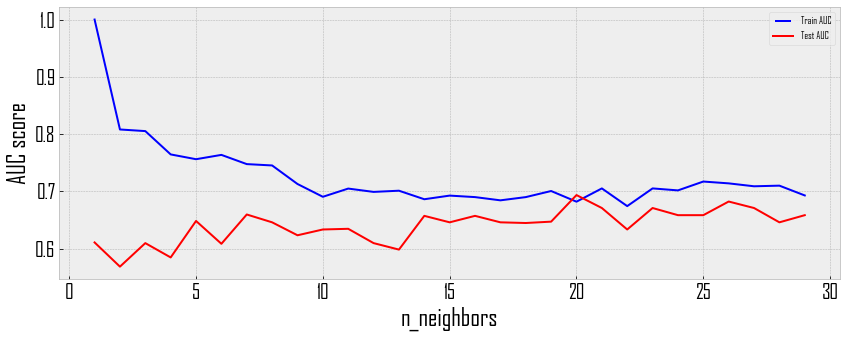

In [43]:
# ROC Curve for Number of Neighbors

neighbors = list(range(1,30))
train_results = []
test_results = []

for n in neighbors:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(neighbors, train_results, "b", label="Train AUC")
line2, = plt.plot(neighbors, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score",size=25)
plt.xlabel("n_neighbors",size=25)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

#### c-3) Re-evaluating KNN Model

In [44]:
# creating a new model with new parameters based on above information

kn_model = KNeighborsClassifier(n_neighbors=10)

# fitting model
kn_model.fit(X_train,y_train)

# predicting outcome
y_pred_kn = kn_model.predict(X_test)

pd.DataFrame({"Actual":y_test,"Predicted":y_pred_kn}).sample(10)

print("Accuracy score is {:.2f}.".format(accuracy_score(y_test,y_pred_kn)))
print("Sensivity score is {:.3f}.".format(recall_score(y_test,y_pred_kn)))
#print(f"Precision score is {str(precision)[:5]}.")
print(f"F-1 score is {str(f1_score(y_test,y_pred_kn))[:4]}.\n\n")

print(classification_report(y_test,y_pred_kn))
print(f"\n\nROC AUC Score: {roc_auc_score(y_test,y_pred_kn)}")

Accuracy score is 0.62.
Sensivity score is 0.600.
F-1 score is 0.67.


              precision    recall  f1-score   support

           0       0.47      0.67      0.55        21
           1       0.77      0.60      0.68        40

    accuracy                           0.62        61
   macro avg       0.62      0.63      0.61        61
weighted avg       0.67      0.62      0.63        61



ROC AUC Score: 0.6333333333333334


In [45]:
'''
Summary

After hyperparameter tuning ROC AUC score increased from 0.46 to 0.69, yet still this 
score is not good enough.

''' 

'\nSummary\n\nAfter hyperparameter tuning ROC AUC score increased from 0.46 to 0.69, yet still this \nscore is not good enough.\n\n'

#### d) Support Vector Machine (SVM) Model 

In [46]:
# creating the model
svm_model = SVC()

# fitting model
svm_model.fit(X_train,y_train)
    
# predicting outcome
y_pred_svm = svm_model.predict(X_test)

pd.DataFrame({"Actual":y_test,"Predicted":y_pred_svm}).sample(10)

,Actual,Predicted
36,1,1
41,1,1
106,1,0
2,1,1
252,0,0
279,0,0
295,0,1
289,0,0
79,1,1
107,1,1


#### d-1) Evaluating SVM

In [47]:
print("Accuracy score is {:.2f}.".format(accuracy_score(y_test,y_pred_svm)))
print("Sensivity score is {:.3f}.".format(recall_score(y_test,y_pred_svm)))
#print(f"Precision score is {str(precision)[:5]}.")
print(f"F-1 score is {str(f1_score(y_test,y_pred_svm))[:4]}.\n\n")

print(classification_report(y_test,y_pred_svm))
print(f"\n\nROC AUC Score: {roc_auc_score(y_test,y_pred_svm)}")

Accuracy score is 0.72.
Sensivity score is 0.775.
F-1 score is 0.78.


              precision    recall  f1-score   support

           0       0.59      0.62      0.60        21
           1       0.79      0.78      0.78        40

    accuracy                           0.72        61
   macro avg       0.69      0.70      0.69        61
weighted avg       0.72      0.72      0.72        61



ROC AUC Score: 0.6970238095238096


In [48]:
'''
Summary

Initial performance score is 0.62, no further hyperparameter tuning is needed since I obtained
better initial results in other models.

''' 

'\nSummary\n\nInitial performance score is 0.62, no further hyperparameter tuning is needed since I obtained\nbetter initial results in other models.\n\n'

## Summary

Best result was achieved by using Random Forest Classification Model for this predictive analysis.

Tuning parameters in random forest model help me to achieve even better results than logistic regression.

I could have tried to increase performance more for random forest yet due to limited time this scores are good enough to end the project.

###### Gorkem Guneser - 27.11.2020